In [250]:
import pandas as pd
import numpy as np
import re 
from matplotlib import pyplot as plt
plt.style.use('ggplot')

This Project aims at analyzing Data Science jobs data extracted from www.glassdoor.com using scrapy and selenium.

#### Our major questions:
* 1- What is the dirtibution of jobs per states?
* 2- What industries are prominent in each states?
* 3- Is Data Sciences really a three figures job?
* 4- Which sector/Industry holds the most Data Science job
* 5- Which companies(old or new) are creating most Data Science Jobs ?

In [445]:
# Reading clean dat
job_df = pd.read_csv('./clean_data/clean_data.csv')

In [446]:
# Quick look at the data
job_df.head()

,company,city,state,year_founded,size,rating_c,job_title,days_posted_c,start_salary,max_salary,industry,sector
0,1010data,New York,NY,2000,201 to 500 employees,3.0,Software Data Engineer,12.0,105.0,108.0,Computer Hardware & Software,Information Technology
1,1010data,New York,NY,2000,201 to 500 employees,3.0,"Sr. Software Development Engineer, Linux",15.0,73.0,147.0,Computer Hardware & Software,Information Technology
2,1904labs,Saint Louis,MO,2016,51 to 200 employees,5.0,Data Scientist,19.0,90.0,109.0,IT Services,Information Technology
3,2U,New York,NY,NaN,NaN,4.0,"Manager, AB Testing and Data Operations",9.0,0.0,0.0,NaN,NaN
4,2nd.MD,Houston,TX,2011,51 to 200 employees,5.0,Director of Quality Programs & Clinical Analytics,13.0,126.0,158.0,Health Care Services & Hospitals,Health Care


### Extra cleaning for graphs and aggregations

In [448]:
job_df.state = job_df.state.str.strip()

In [449]:
job_df.start_salary = job_df.start_salary.map(lambda x: int( x * 1000))

In [450]:
job_df.max_salary = job_df.max_salary.map(lambda x: int( x * 1000))

In [451]:
#Convert Year founded to int
job_df.year_founded = job_df.year_founded.map(lambda x: int(x) if type(x) is not float and len(x) in range(1,6) else 0)

In [452]:
#Set sector with undetermined sector ('500𝑚𝑖𝑙𝑙𝑖𝑜𝑛𝑡𝑜 1 billion (USD)', 100𝑡𝑜 500 million (USD)) to Unknown: #194, 257,541,171
job_df.loc[[194, 257,541,171],'sector']  = 'Unkown'

#### 1- Top 20 States

In [453]:
group_st = job_df.groupby('state')

In [407]:
top_20 = group_st['state'].agg(['count']).sort_values('count',ascending=False).head(20)

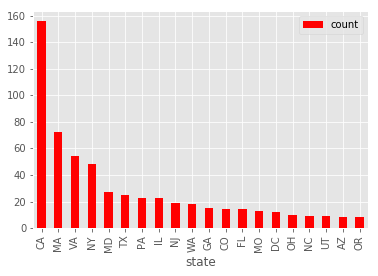

In [254]:
top_20.plot.bar(color='r');

#### 2- Top 20 sectors 

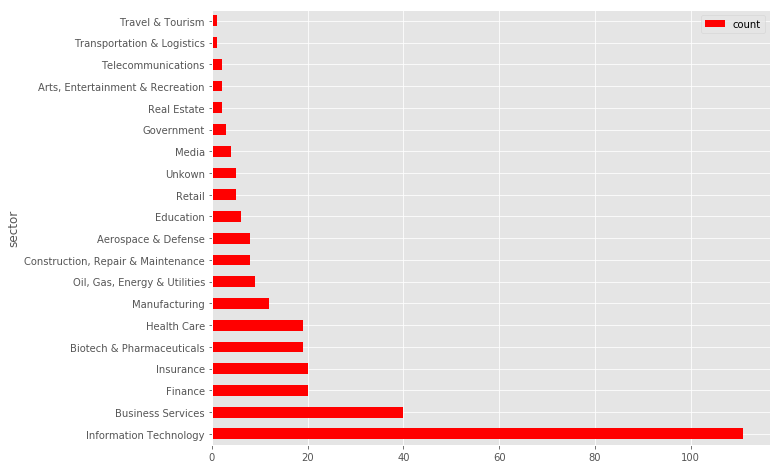

In [529]:
job_df.groupby('sector')['sector'].agg(['count']).sort_values('count',ascending=False \
                                                             ).head(20).plot.barh(figsize=(10,8), color='r');

###### A drilled down of specific sectors by State  

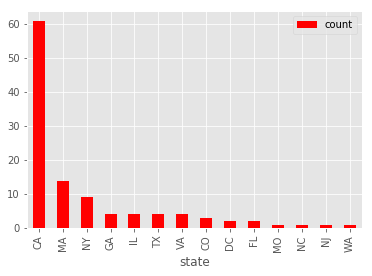

In [456]:
sector_st = job_df[job_df.sector == 'Information Technology']
sector_st.groupby(['state'])['state'].agg(['count']\
                                                ).sort_values('count',ascending=False).head(20).plot.bar(color='r');

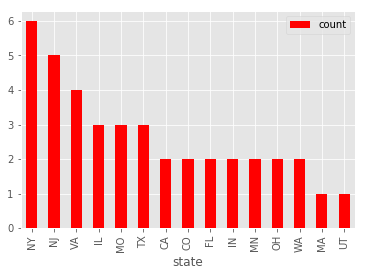

In [457]:
sector_st = job_df[job_df.sector == 'Business Services']
sector_st.groupby(['state'])['state'].agg(['count']\
                                                ).sort_values('count',ascending=False).head(20).plot.bar(color='r');

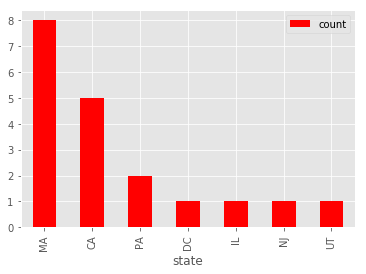

In [458]:
sector_st = job_df[job_df.sector == 'Biotech & Pharmaceuticals']
sector_st.groupby(['state'])['state'].agg(['count']\
                                                ).sort_values('count',ascending=False).head(20).plot.bar(color='r');

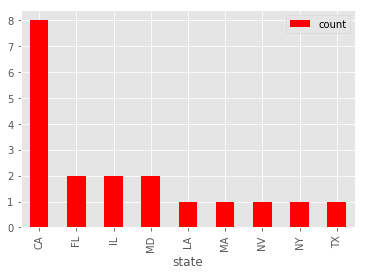

In [459]:
sector_st = job_df[job_df.sector == 'Health Care']
sector_st.groupby(['state'])['state'].agg(['count']\
                                                ).sort_values('count',ascending=False).head(20).plot.bar(color='r');

#### A look at top 20 sectors by state

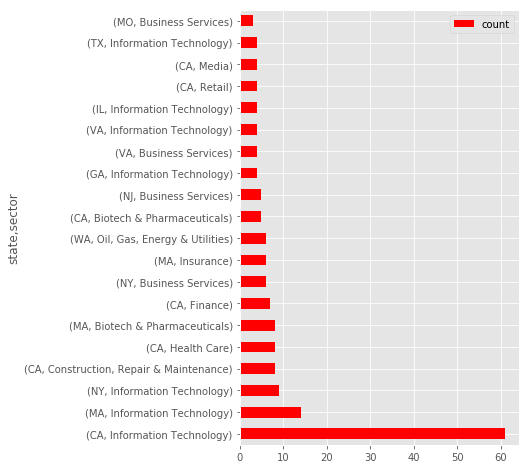

In [460]:
job_df.groupby(['state','sector'])['sector'].agg(['count'] \
              ).sort_values('count',ascending=False).head(20).plot.barh(figsize=(5,8),rot=0,color='r');

#### 3- Glassdoor estimated maximum per state

In [428]:
job_df2 = job_df[job_df.start_salary > 0]

C:\Users\patri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


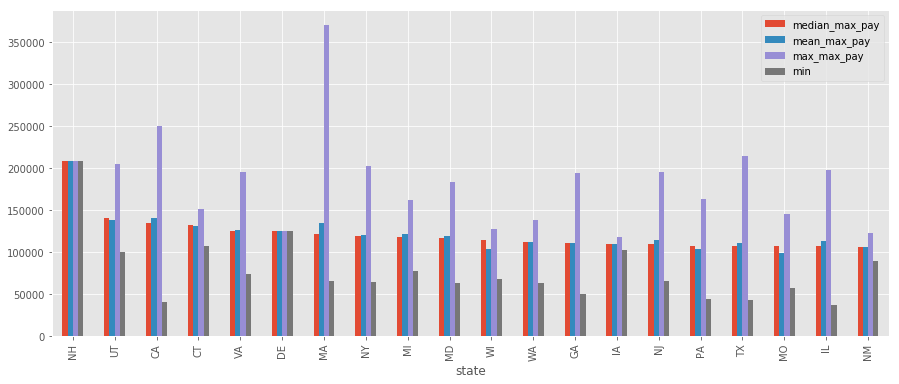

In [430]:
job_df2.groupby('state')['max_salary'].agg({'median_max_pay':'median', 'mean_max_pay':'mean','max_max_pay':'max', \
                                            'min_max_pay':'min'}).sort_values('median_max_pay',ascending=False \
                                             ).head(20).plot.bar(figsize=(15,6));

#### 3- Glassdoor estimated minimum per state

C:\Users\patri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


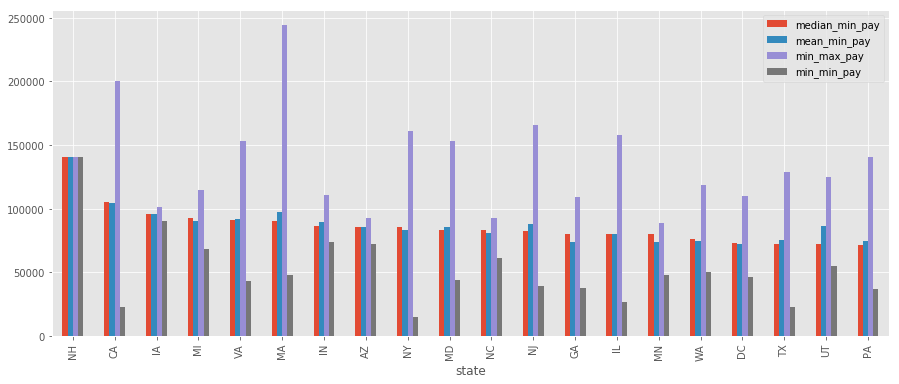

In [432]:
job_df2.groupby('state')['start_salary'].agg({'median_min_pay':'median', 'mean_min_pay':'mean','min_max_pay':'max',\
                                            'min_min_pay':'min'}).sort_values('median_min_pay',ascending=False\
                                             ).head(20).plot.bar(figsize=(15,6));

####  Top 20 demanded positions

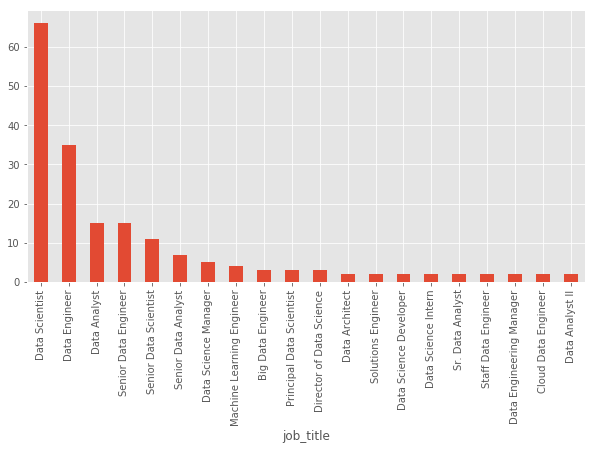

In [440]:

job_df.groupby('job_title')['company'].agg('count').sort_values(ascending=False).head(20).plot.bar(figsize=(10,5));

##### Glassdoor estimated maximum Pay of the top 20 

C:\Users\patri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


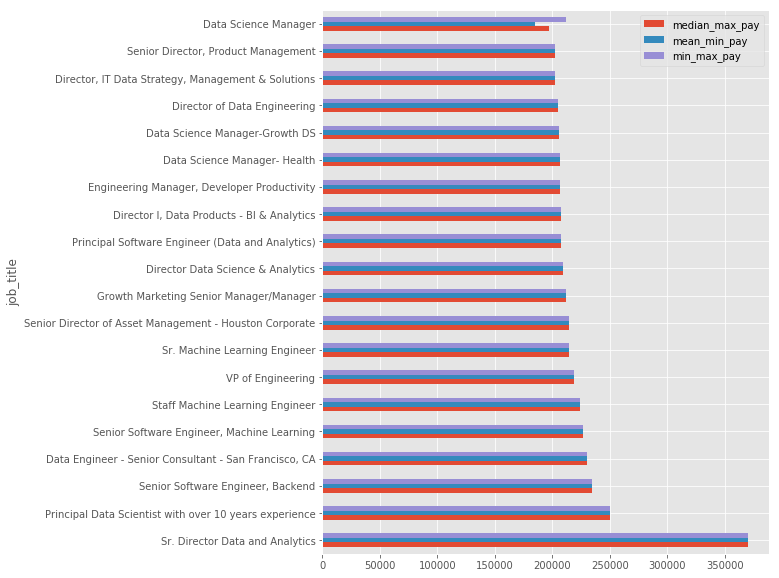

In [433]:
job_df2.groupby('job_title')['max_salary'].agg({'median_max_pay':'median', 'mean_min_pay':'mean','min_max_pay':'max'}\
                            ).sort_values('median_max_pay',ascending=False).head(20).plot.barh(figsize=(8,10))

##### Glassdoor estimated minimum Pay of the top 20 

C:\Users\patri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


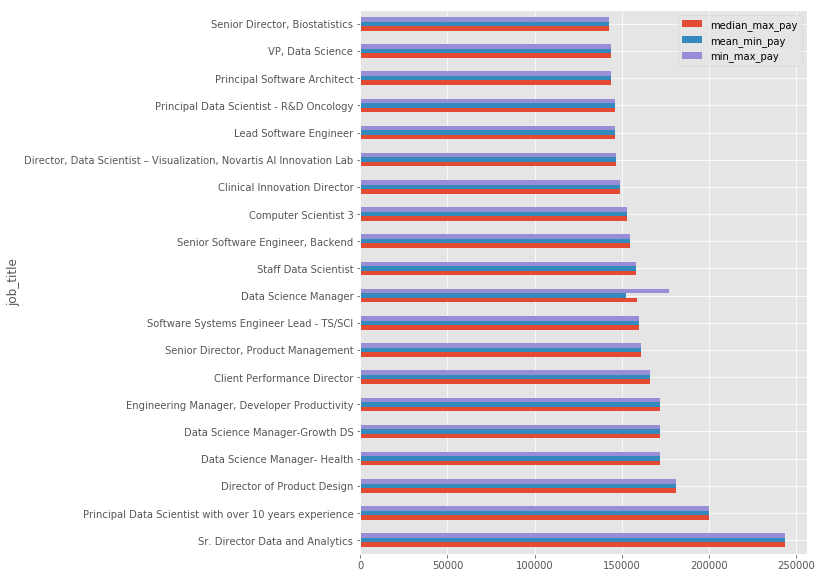

In [434]:
job_df2.groupby('job_title')['start_salary'].agg({'median_max_pay':'median', 'mean_min_pay':'mean','min_max_pay':'max'}\
                            ).sort_values('median_max_pay',ascending=False).head(20).plot.barh(figsize=(8,10));

##### 5- Distribution of job positions per year company was founded 
Data Science jobs are created by newly created company

In [310]:
year_df = job_df[job_df.year_founded!=0] 

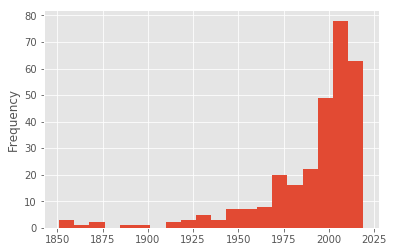

In [532]:
year_df['year_founded'].plot.hist(bins=20);

##### Average rating (1-5 shows how good a company takes care of his employees) of company per state

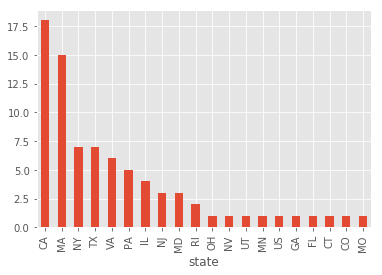

In [534]:
top_r = job_df[job_df.rating_c == 5.0] # 4
top_r.groupby('state')['state'].agg('count').sort_values(ascending=False).plot.bar()

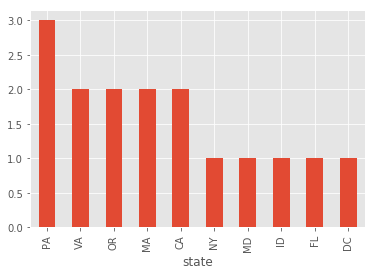

In [535]:
low_r = job_df[job_df.rating_c <3.0]
low_r.groupby('state')['state'].agg('count').sort_values(ascending=False).plot.bar();

Average rating per state

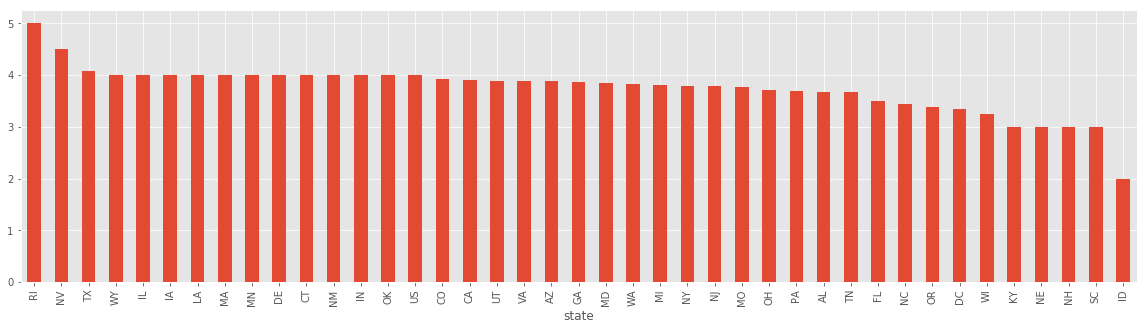

In [536]:
job_df.groupby('state')['rating_c'].mean().sort_values(ascending=False).plot.bar(figsize=(20,5));

 ##### Number of jobs that were expired  two days after my initial scrap

C:\Users\patri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


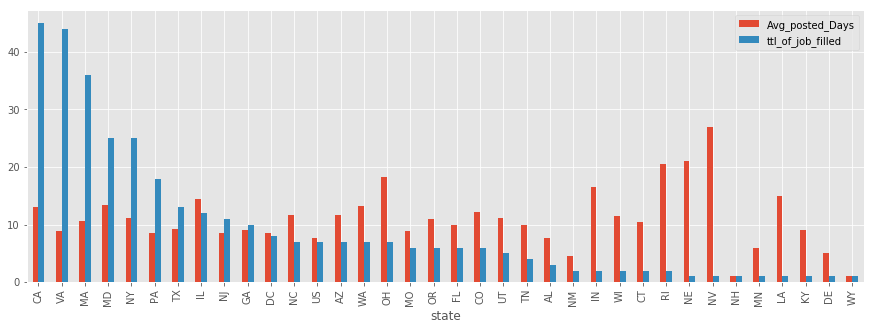

In [527]:
job_df[job_df.sector.isnull()].groupby('state')['days_posted_c'].agg({'Avg_posted_Days':'mean','ttl_of_job_filled':'count'} \
                                ).sort_values('ttl_of_job_filled',ascending=False).plot.bar(figsize=(15,5));